FIRST OF ALL I IMPORT THE DATASET FROM LOCAL TO COLLAB

In [1]:
from google.colab import files

# Upload the file manually from your computer
uploaded = files.upload()


Saving SEGMENTATION.xlsx to SEGMENTATION.xlsx


KNOW LOAD DATASET IN COLLAB USING PANDAS AND SHOW FIRST 5 ROWS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/SEGMENTATION.xlsx'
df = pd.read_excel(file_path)

print("First 5 Rows:")
print(df.head())

First 5 Rows:
          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


Do preprocessing in which check duplicate and null values and Remove Id from dataset because it not help in prediction purposes

In [4]:
print("\nColumns in dataset:")
print(df.columns)
# drop id here
df = df.drop('ID', axis=1)
# check no of null and dupliation
print("\nMissing Values:\n", df.isnull().sum())

print("\nNumber of Duplicate Rows:", df.duplicated().sum())
#drop duplicate rows
df = df.drop_duplicates()


Columns in dataset:
Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

Missing Values:
 Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

Number of Duplicate Rows: 0


 Step 2: Plot Count of Males and Females::We now analyze the gender distribution of customers to understand if one gender is more dominant.

<ipython-input-5-96ca59498544>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')


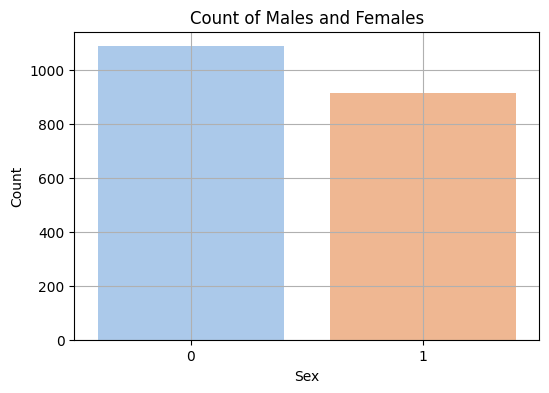

In [5]:
# Gender count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Count of Males and Females')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Visualize Age Distribution by Sex (Histogram) ::To understand how age is distributed among male and female customers, we use histograms with different colors for each sex.

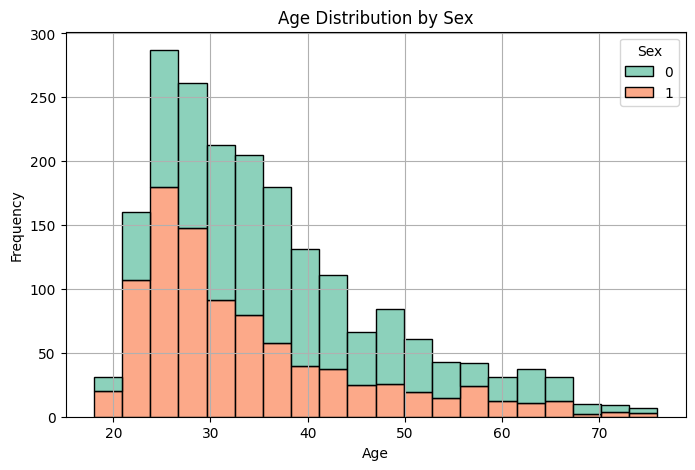

In [6]:
# Age distribution by sex
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', palette='Set2', bins=20)
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Scatter Plot - Income vs. Age Differentiated by Sex:: This plot helps us understand if income is related to age and whether there are patterns based on gender.

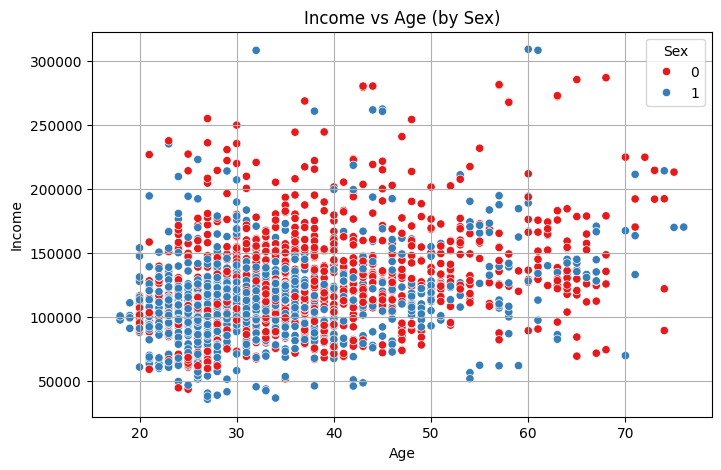

In [7]:
# Scatter plot: Income vs Age by Sex
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Income', hue='Sex', palette='Set1')
plt.title('Income vs Age (by Sex)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()


 Analyze Average Income by Occupation::To find out which occupations earn more on average, we calculate the mean income for each occupation and visualize it.

<ipython-input-12-839f527609dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_occupation.index, y=avg_income_occupation.values, palette='Blues_d')


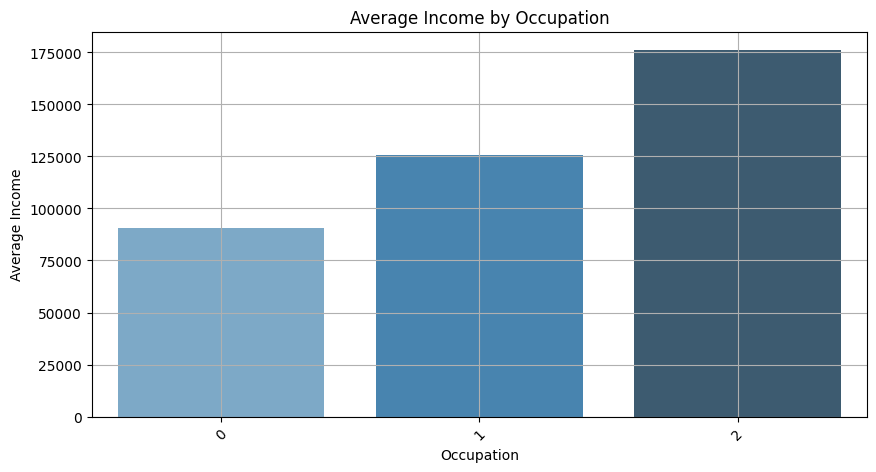

In [12]:
# Average income by occupation
plt.figure(figsize=(10, 5))
avg_income_occupation = df.groupby('Occupation')['Income'].mean().sort_values(ascending=False)
sns.barplot(x=avg_income_occupation.index, y=avg_income_occupation.values, palette='Blues_d')
plt.title('Average Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


 Analyze Average Income by Education :: We explore how education level affects average income.

<ipython-input-9-f9a3007bb6c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_education.index, y=avg_income_education.values, palette='Greens')


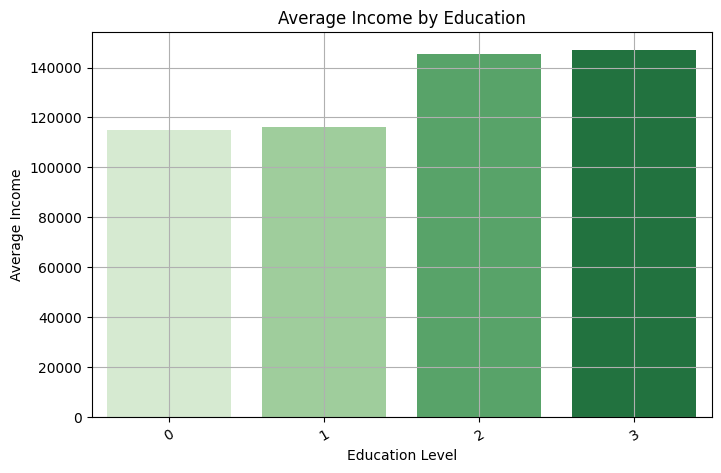

In [9]:
# Average income by education
plt.figure(figsize=(8, 5))
avg_income_education = df.groupby('Education')['Income'].mean().sort_values(ascending=False)
sns.barplot(x=avg_income_education.index, y=avg_income_education.values, palette='Greens')
plt.title('Average Income by Education')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()


 Occupation Distribution Across Education Levels:: We examine how different education levels are distributed across occupations using a count plot.

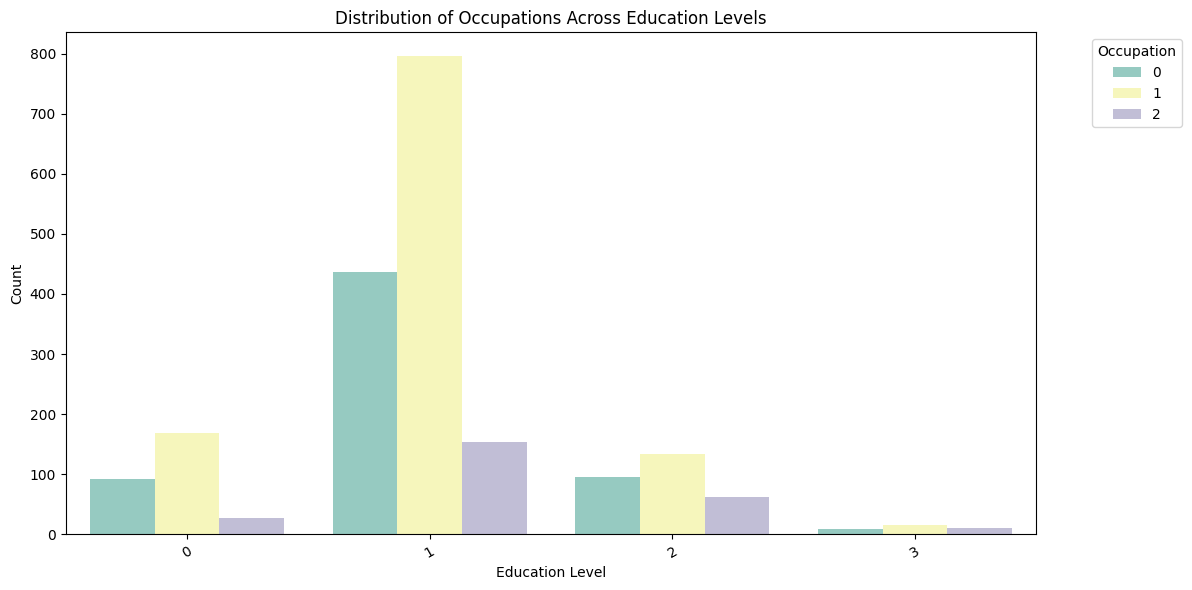

In [10]:
# Occupation vs Education count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Education', hue='Occupation', palette='Set3')
plt.title('Distribution of Occupations Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
